<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/fasle2class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [6]:
train_images[20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
train_labels[20]

4

In [11]:
from numpy import float32
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype(float32)/255

In [12]:
from keras.utils import to_categorical
train_labels=to_categorical(train_labels,num_classes=10)
test_labels=to_categorical(test_labels)

In [13]:
train_labels[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras import models
from keras import layers
from keras.activations import softmax,relu
model=models.Sequential()
model.add(layers.Input(shape=(28*28,),name='input_layer'))
model.add(layers.Dense(512,activation=relu,name='prelogics'))
model.add(layers.Dense(10,activation=softmax,name='logics'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prelogics (Dense)           (None, 512)               401920    
                                                                 
 logics (Dense)              (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


API model 

In [ ]:
input=layers.Input(shape=784)
x=layers.Dense(512,activation='relu')(input)
output=layers.Dense(10,activation='softmax')(x)
model=models.Model(input,output)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics='accuracy')
hist=model.fit(train_images,train_labels,epochs=5,batch_size=128,validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 11s 27ms/step - loss: 0.2973 - accuracy: 0.9146 - val_loss: 0.1683 - val_accuracy: 0.9515
Epoch 2/5
375/375 [==============================] - 8s 22ms/step - loss: 0.1239 - accuracy: 0.9641 - val_loss: 0.1211 - val_accuracy: 0.9631
Epoch 3/5
375/375 [==============================] - 11s 28ms/step - loss: 0.0806 - accuracy: 0.9767 - val_loss: 0.0914 - val_accuracy: 0.9743
Epoch 4/5
375/375 [==============================] - 8s 22ms/step - loss: 0.0570 - accuracy: 0.9831 - val_loss: 0.0871 - val_accuracy: 0.9743
Epoch 5/5
375/375 [==============================] - 10s 26ms/step - loss: 0.0431 - accuracy: 0.9877 - val_loss: 0.0797 - val_accuracy: 0.9765


In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
from keras.losses import categorical_crossentropy
#from keras.optimizers import rmsprop

model.compile(optimizer='rmsprop',loss=categorical_crossentropy,metrics='accuracy')
history=model.fit(train_images,train_labels,batch_size=128,epochs=5)

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0304 - accuracy: 0.9912
Epoch 2/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0224 - accuracy: 0.9935
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0168 - accuracy: 0.9955
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0130 - accuracy: 0.9964
Epoch 5/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0094 - accuracy: 0.9977


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

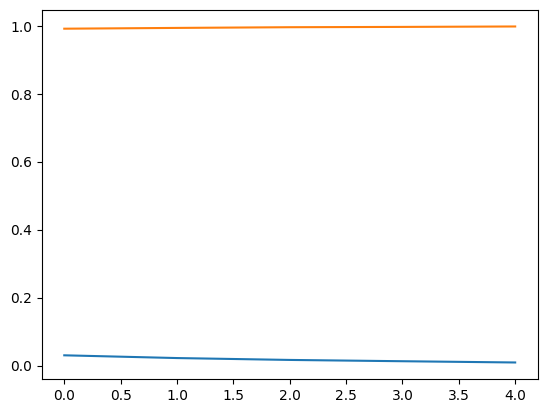

In [ ]:
import matplotlib.pyplot as plt

loss=history.history['loss']
accuracy=history.history['accuracy']
plt.plot(loss)
plt.plot(accuracy)
plt.show()

In [ ]:
eva_loss,eva_accuracy=model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.0634 - accuracy: 0.9818


[0.06340469419956207, 0.9818000197410583]

In [ ]:
predict_labels=model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


In [ ]:
import numpy as np

In [ ]:
x=np.array(12)
print(x.ndim)
print(np.ndim(x))

print(x.dtype)
#print(np.dtype(x))

print(x.shape)
print(np.shape(x))


0
0
int64
()
()


In [ ]:
x=np.array([1,2,3,4,5])
print(x.ndim)
print(np.ndim(x))

print(x.dtype)
#print(np.dtype(x))

print(x.shape)
print(np.shape(x))

1
1
int64
(5,)
(5,)


In [ ]:
x=np.array([[1,2,3,4,5],
            [2,3,4,5,6],
            [3,4,5,6,7]],dtype='int8')
print(x.ndim)
print(np.ndim(x))

print(x.dtype)
#print(np.dtype(x))

print(x.shape)
print(np.shape(x))

2
2
int8
(3, 5)
(3, 5)


In [ ]:
x=np.array([[[1,2,3,4,5],
             [2,3,4,5,6],
             [2,3,4,5,6]],
            [[2,3,4,5,6],
             [3,4,5,6,7],
             [4,5,6,7,8]]])
print(x.ndim)
print(np.ndim(x))

print(x.dtype)
#print(np.dtype(x))

print(x.shape)
print(np.shape(x))

3
3
int64
(2, 3, 5)
(2, 3, 5)


# access to data

In [ ]:
x[0,1,2]
#OR
x[0][1][2]
#All result is same

4

In [ ]:
print(train_images.ndim)
print(train_images.dtype)
print(train_images.shape)

3
uint8
(60000, 28, 28)


In [ ]:
train_images[200,10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253,
       254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [ ]:
#tensor slicing
my_slice=train_images[10:100]
print(my_slice.shape)
my_slice2=train_images[:,7:-7,7:-7]
print(my_slice2.shape)

(90, 28, 28)
(60000, 14, 14)


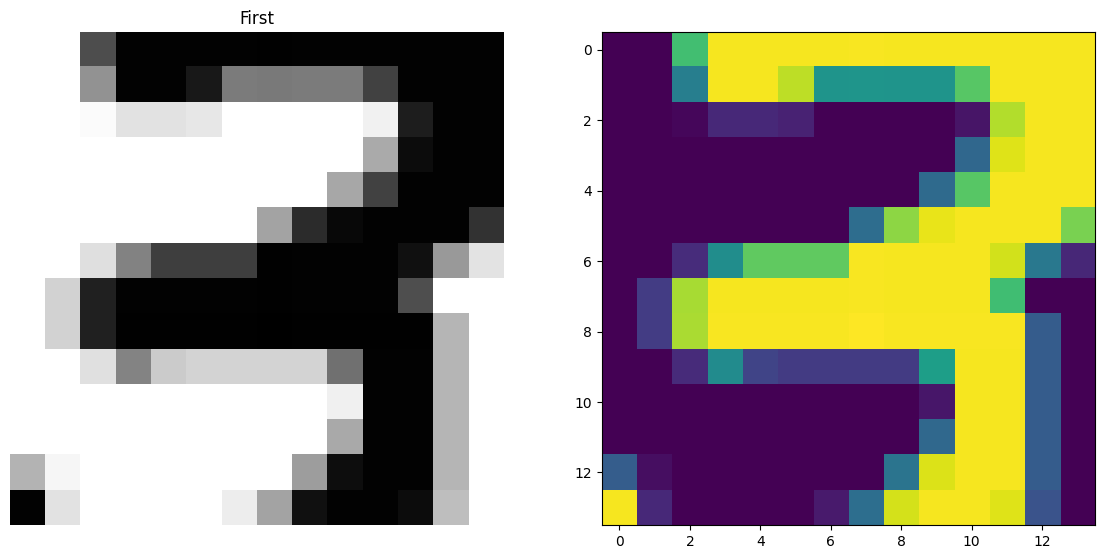

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,14))
fig.add_subplot(1,2,1)
plt.axis('off')
plt.title("First")
plt.imshow(my_slice2[7],cmap=plt.cm.binary)
fig.add_subplot(1,2,2)
plt.imshow(my_slice2[7])
#plt.show()

In [ ]:
#data batches
batch=train_images[:128]
batch=train_images[128:256]

'batch1'

In [ ]:

from keras.utils.tf_utils import convert_variables_to_tensors
batch_size=128
for n in range(round(len(train_images)/batch_size)):
  exec(f'batch_{n}=train_images[128*n:128*(n+1)]')

# ❑ Vector data—2D tensors of shape
 (samples, features)
# ❑ Timeseries data or sequence data—3D tensors of shape 
 (samples,timesteps, features)
# ❑ Images—4D tensors of shape
 (samples, height, width,channels) or
 (samples, channels, height, width)
# ❑ Video—5D tensors of shape
 (samples, frames, height, width,channels) or
 (samples, frames, channels, height, width)

## Tensor operations

In [ ]:
a=np.array([1,2,4])
b=np.array([2,3,3])
c=a*b
print(c)
t=np.dot(a,b)
print(t)

[ 2  6 12]
20


In [ ]:
b=np.array([[2,1,3],
            [1,1,2]])
a=np.array([[1],
            [1],
            [2]])
t=np.dot(b,a)
print(t)

[[9]
 [6]]


keras.layers.Dense(512, activation='relu’, input_shape(28*28,))

The function is as follows (where W is a 2D tensor and b is a vector, both
attributes of the layer):

# ❑ Let’s unpack this. We have three tensor operations here:
# ❑ a dot product (dot) between the input tensor and a tensor named W;
# ❑ (+) between the resulting 2D tensor and a vector b;
# ❑ and, finally, a relu operation. relu(x) is max(x, 0).


In [ ]:
#output = relu(dot(input,w) + b)

In [ ]:
import numpy as np
input=np.random.rand(1,784)
w=np.random.rand(784,512)
b=np.random.rand(512,)
dot=np.dot(input,w)
#print(dot)
#dot_bais=(dot+b)
#relu fanction
import keras
from keras.activations import relu
output = relu(dot+b)


batch file =128
(broadcasting in b input)

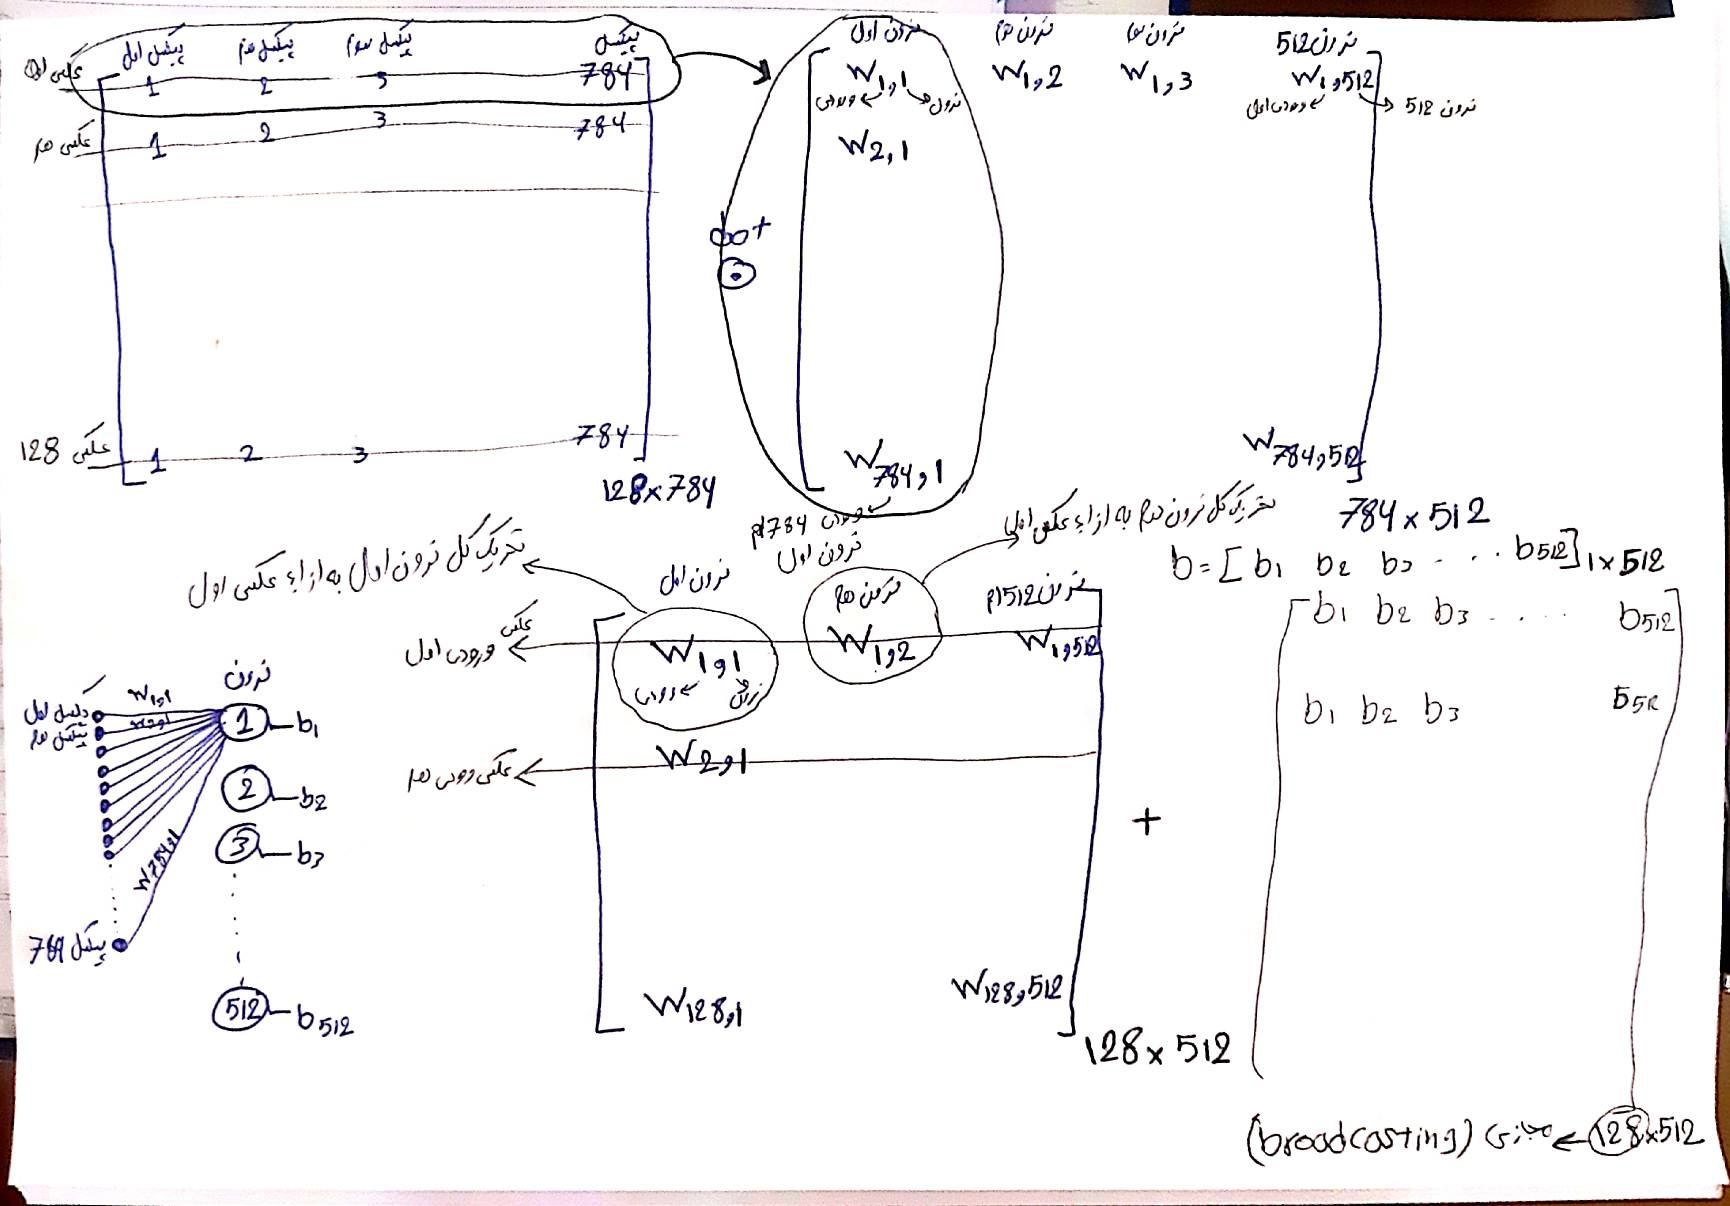

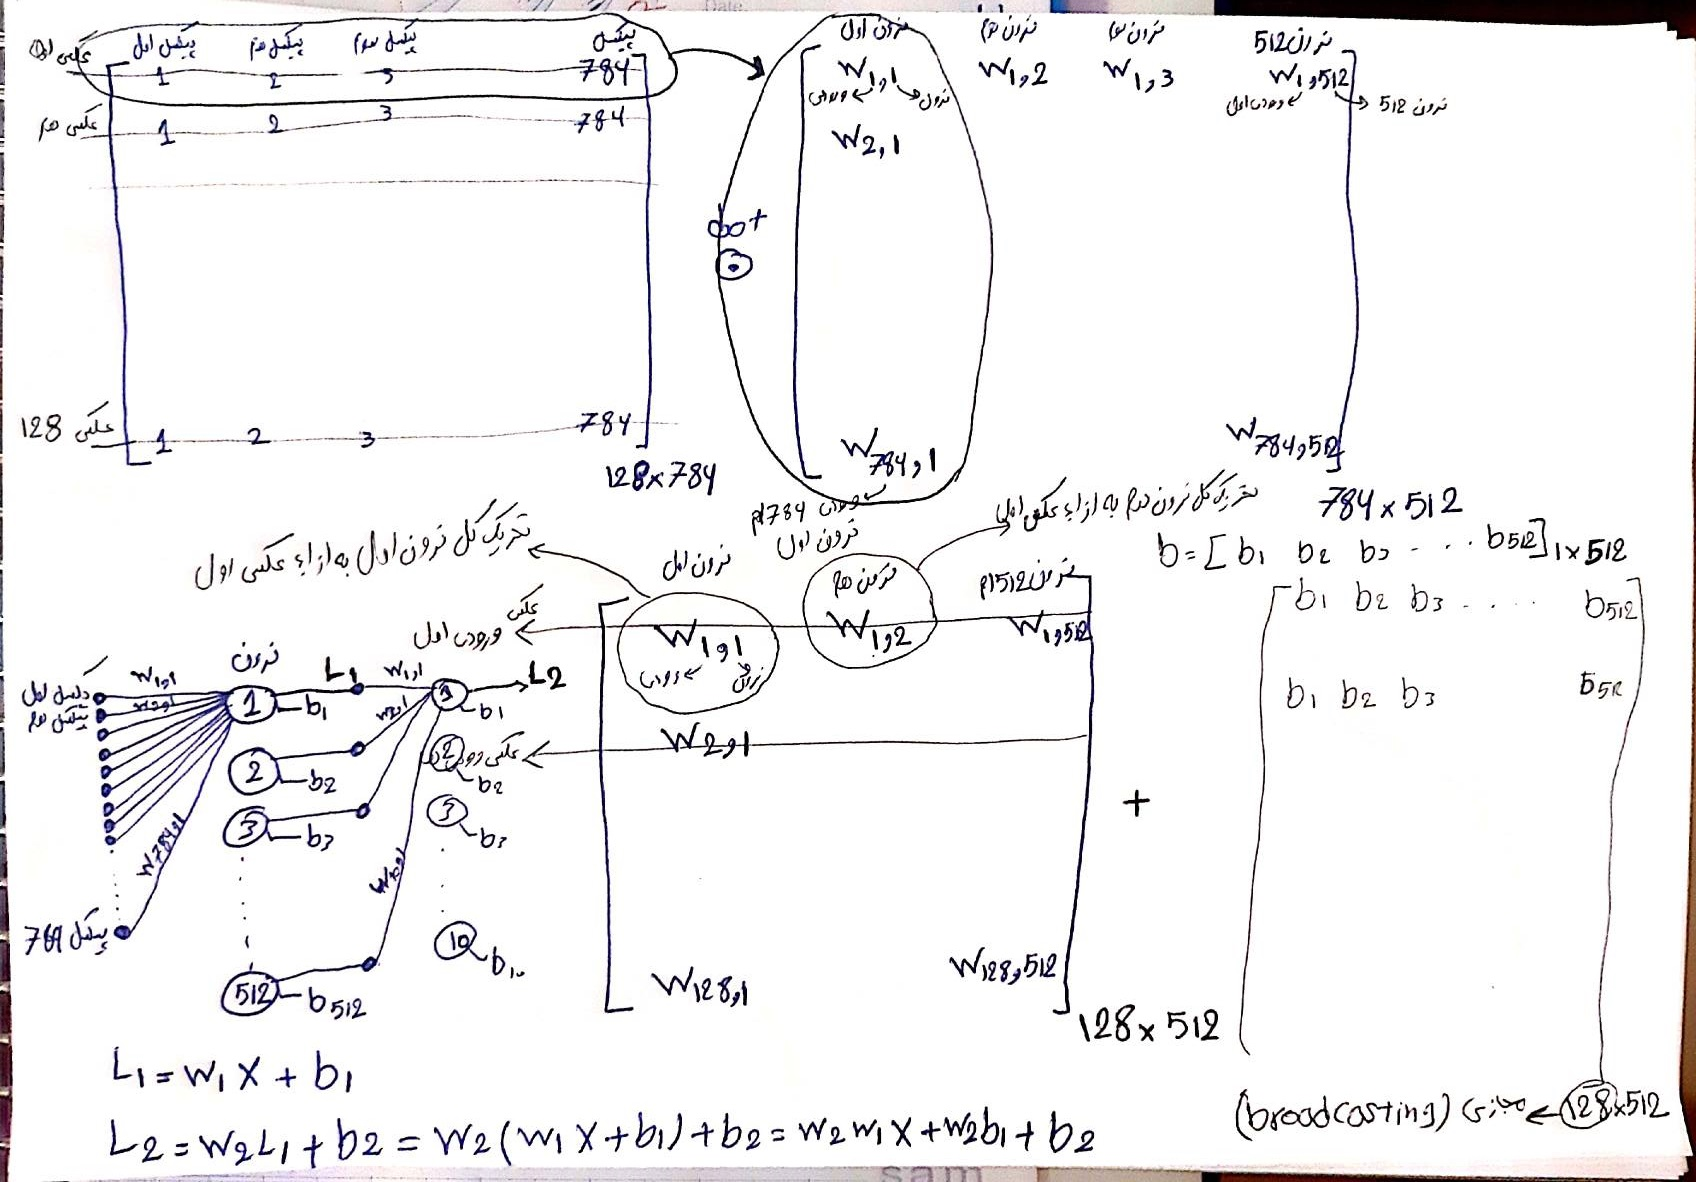

In [ ]:
import numpy as np
input=np.random.rand(128,784)
w=np.random.rand(784,512)
b=np.random.rand(1,512)
dot=np.dot(input,w)
import keras
from keras.activations import relu
output = relu(dot+b)


# Tensor reshaping

In [ ]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print(x.shape)

(3, 2)


In [ ]:
e=x.reshape((6,1))
print(e)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


In [ ]:
x=x.reshape((2,3))
print(x)

[[0. 1. 2.]
 [3. 4. 5.]]


اگر خواستی آخر سطر یا ستون را حساب نکنی منفی یک بزار

In [ ]:
x=x.reshape(1,-1)
print(x)

[[0. 1. 2. 3. 4. 5.]]


In [ ]:
x=x.reshape(6,-1)
print(x)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


# Transposition

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


Geometric interpretation of tensor
operations
تفسیر هندسی عملیات تنسوری